In [17]:
from sklearn.datasets import make_blobs

# centers=2 (2 class), cluster_std 클러스터의 표준편차
x, y = make_blobs(n_samples=100, centers=2, cluster_std=0.5, random_state=0)

# C: 오차에 대한 패널티, gamma: sample의 영향력
x, y

(array([[ 3.1368855 ,  1.56592763],
        [ 1.4815332 ,  0.67875364],
        [ 0.3498724 ,  4.69253251],
        [ 0.5323772 ,  3.31338909],
        [ 2.64928242,  1.05613497],
        [ 1.2091013 ,  3.53566548],
        [ 0.99914934,  4.2101954 ],
        [ 3.01673853,  1.63792106],
        [ 0.78260667,  4.15263595],
        [ 1.65356269,  0.55288877],
        [ 0.802314  ,  4.38196181],
        [ 1.8706766 ,  0.77797407],
        [ 1.08040757,  4.79210685],
        [ 0.5226209 ,  4.32976003],
        [ 1.92126584,  1.29889186],
        [ 3.24683991,  1.3699034 ],
        [ 2.61858548,  0.35769791],
        [ 0.64003985,  4.12401075],
        [ 1.39731382,  0.66687136],
        [ 1.67030948,  1.16728826],
        [ 1.05374379,  4.49286859],
        [ 0.82049381,  4.33187   ],
        [ 1.68548602,  1.66917096],
        [ 0.39369516,  4.75420057],
        [ 2.31690585,  0.81189049],
        [ 0.92466065,  4.50908658],
        [ 1.68289011,  0.48444439],
        [ 0.98152009,  5.196

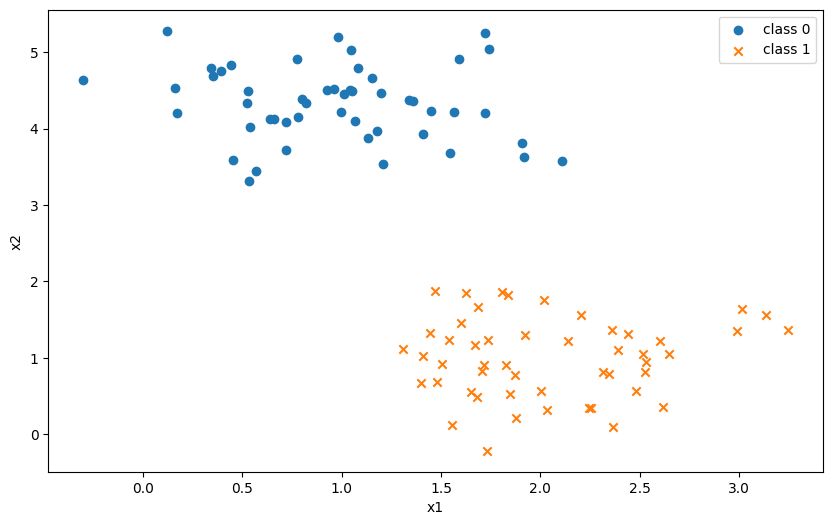

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(x[y == 0, 0], x[y == 0, 1], marker='o', label="class 0")
plt.scatter(x[y == 1, 0], x[y == 1, 1], marker='x', label="class 1")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

In [19]:
from sklearn.model_selection import train_test_split

x_tr, x_ts, y_tr, y_ts = train_test_split(x, y, test_size=0.2, stratify=y, random_state=10)

In [20]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# model
model = SVC(kernel = 'linear').fit(x_tr, y_tr)

In [21]:
# 클래스별 서포트 벡터의 개수(0 2개, 1 1개)
model.n_support_

array([2, 1])

In [22]:
# support vector의 인덱스
model.support_

array([18, 43, 13])

In [23]:
# 서포트 벡터의 값

model.support_vectors_

array([[0.5323772 , 3.31338909],
       [2.11114739, 3.57660449],
       [1.46870582, 1.86947425]])

In [24]:
import numpy as np
def plot_svc(model,ax=None):

    if ax==None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # 그래프 그리드
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x) # 정방행렬로 만들고
    xy = np.vstack([X.ravel(), Y.ravel()]).T #1차원으로 만들고 행렬 전치
    
    # 판별함수에 입력하고
    P = model.decision_function(xy).reshape(X.shape)    

    # decision boundary와 margins
    # 등고선, 2차원 넘파이 배열
    ax.contour(X, Y, P,
               levels=[-1, 0, 1],
               linestyles=['--', '-', '--'])    

    # 서포트 벡터 출력
    ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=200)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

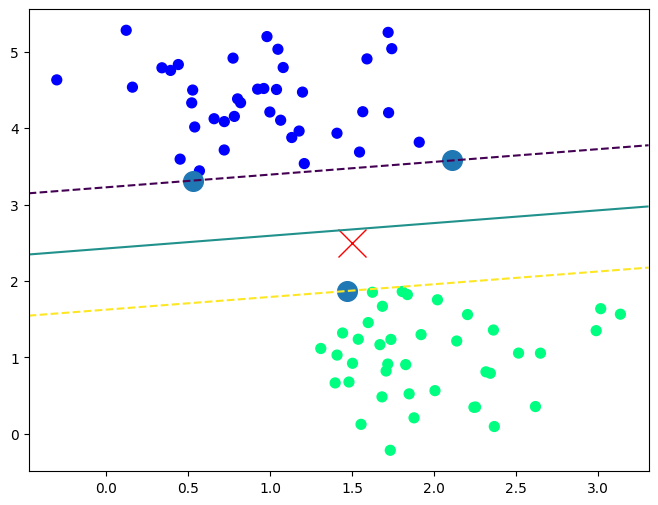

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8, 6))
plt.scatter(x_tr[:, 0], x_tr[:, 1], c=y_tr, s=50, cmap='winter')

plt.plot([1.5], [2.5], 'x', color='red', markersize=20)
plot_svc(model)

In [26]:
model.predict([[1.5, 2.5]])

array([1])

In [27]:
from sklearn.model_selection import GridSearchCV
params = {'C': [0.1, 1, 10, 100], 'gamma':[0.00001, 0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(SVC(), params)
grid.fit(x_tr, y_tr)
print('Best Parameters:', grid.best_params_)
print('Best Estimator:', grid.best_estimator_)


Best Parameters: {'C': 0.1, 'gamma': 1e-05}
Best Estimator: SVC(C=0.1, gamma=1e-05)


In [28]:
model = grid.best_estimator_
model

SVC(C=0.1, gamma=1e-05)

In [29]:
print('학습용: ', model.score(x_tr, y_tr))
print('검증용: ', model.score(x_ts, y_ts))

학습용:  1.0
검증용:  1.0


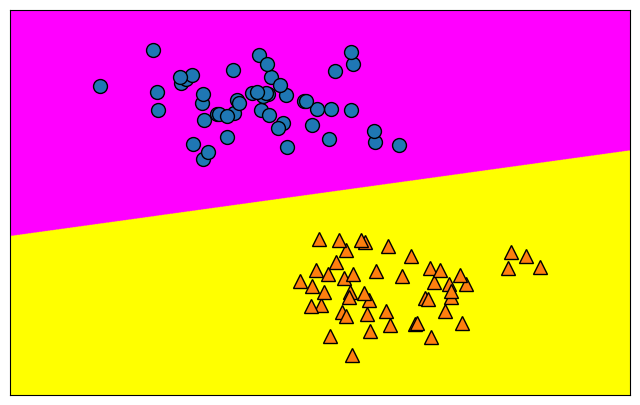

In [30]:
import mglearn

plt.figure(figsize = [8,5])
mglearn.plots.plot_2d_classification(model, x, cm='spring')
mglearn.discrete_scatter(x[:,0], x[:,1], y)